In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

DATA OF ISLAMABAD HOTELS

In [ ]:
url1 = 'https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAKK2viqBsACAdICJDlhMjcxYjEyLTM3MTctNGJkNS1hYzQ3LTgzNjI1YTM5ZWIyMdgCBeACAQ&sid=9d6d7b3e370aefb025a664bc222f7bbf&aid=304142&checkin=2023-12-10&checkout=2023-12-30&dest_id=-2762812&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response1  = requests.get(url1, headers=headers)

In [ ]:
soup1 = BeautifulSoup(response1.text, 'html.parser')

In [ ]:
hotels = soup1.findAll('div', {'data-testid': 'property-card'})

hotels_data = []
for hotel in hotels:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels = pd.DataFrame(hotels_data)
hotels.tail()

,name,location,price,review,ratings
20,Islamabad Transit Guest House,Islamabad,US$211,Review score,4.0
21,Muhammad Homes&Land,"E-11 Sector, Islamabad",US$362,N/A,N/A
22,Penthouse apartment Terrace views prime location,Islamabad,US$665,Good,7.0
23,"GB Lodging House, Islamabad",Islamabad,US$479,Good,7.7
24,"Roomy Signature Hotel, Islamabad","F-6 Sector, Islamabad","US$3,167",Very good,8.0


In [ ]:
url2='https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBqAIDuAL-joGrBsACAdICJDQ1ZWMwMjIwLTYwYmMtNDJiNi1iMDA2LTgxYjQ2NTIwMmJhNdgCBuACAQ&sid=c40cbb77ccb119c1d18b74f0391084cd&aid=304142&checkin=2023-12-10&checkout=2023-12-30&dest_id=-2762812&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&offset=25'
headers={
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response2  = requests.get(url2, headers=headers)

In [ ]:
soup2 = BeautifulSoup(response2.text, 'html.parser')

In [ ]:
hotels2 = soup2.findAll('div', {'data-testid': 'property-card'})

hotels_data2 = []

for hotel in hotels2:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data2.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels2 = pd.DataFrame(hotels_data2)
hotels2.head()

,name,location,price,review,ratings
0,Holidazzle Lodge Islamabad,"G-6 Sector, Islamabad",US$507,Superb,9.2
1,Homtel Signature Suites,Islamabad,US$739,Superb,9.2
2,Elysium Luxurious Apartments Facing Centaurus,"Blue Area, Islamabad","US$1,795",Exceptional,10
3,Hotel Apartments and GuestHouse in Islamabad b...,"E-11 Sector, Islamabad",US$390,Fabulous,8.9
4,Concept Guest House Islamabad,Islamabad,US$317,Exceptional,9.8


DATA WRANGLING OF ISLAMABAD HOTELS

In [ ]:
islamabad_frames = [hotels, hotels2,]
islamabad_df = pd.concat(islamabad_frames, ignore_index=True)


In [ ]:
islamabad_df['location']='Islamabad'
islamabad_df['review'] = islamabad_df['review'].replace(['Review score', 'N/A'], np.nan)
islamabad_df['ratings'] = islamabad_df['ratings'].replace(['N/A'], np.nan)
islamabad_df['review'] = islamabad_df['review'].fillna(islamabad_df['review'].mode()[0])
islamabad_df['ratings'] = islamabad_df['ratings'].fillna(islamabad_df['ratings'].mode()[0])
islamabad_df

,name,location,price,review,ratings
0,Elite Elysium Apartment Facing Centaurus,Islamabad,"US$1,836",Good,7.8
1,Islamabad Marriott Hotel,Islamabad,"US$3,440",Good,7.8
2,"Lexus Grand Hotel, Islamabad",Islamabad,US$422,Good,10
3,"Central House, DHA 2, Islamabad",Islamabad,"US$1,077",Good,10
4,"Family Adventures, 1-Bedroom Apartment",Islamabad,US$626,Exceptional,9.7
5,Studio Apartment - Main Margalla Road,Islamabad,US$331,Very good,8.1
6,MANAMA HOTEL ijp,Islamabad,US$243,Good,5.3
7,"Urban Oasis 2-Bedroom, Main Margallah Rd",Islamabad,US$576,Superb,9.3
8,2 Bedrooms Apartment in Elysium Mall Islamabad,Islamabad,"US$1,683",Good,10
9,Royal Galaxy Residence Islamabad - Near Islama...,Islamabad,US$317,Good,7.5


DATA OF MURREE HOTELS

In [ ]:
url3='https://www.booking.com/searchresults.en-gb.html?ss=Murree%2C+Pakistan&ssne=Islamabad&ssne_untouched=Islamabad&label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBqAIDuAL-joGrBsACAdICJDQ1ZWMwMjIwLTYwYmMtNDJiNi1iMDA2LTgxYjQ2NTIwMmJhNdgCBuACAQ&sid=c40cbb77ccb119c1d18b74f0391084cd&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2769851&dest_type=city&checkin=2023-12-10&checkout=2023-12-30&group_adults=2&no_rooms=1&group_children=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response3  = requests.get(url3, headers=headers)

In [ ]:
soup3 = BeautifulSoup(response3.text, 'html.parser')

In [ ]:
hotels3= soup3.findAll('div', {'data-testid': 'property-card'})

hotels_data3 = []
for hotel in hotels3:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data3.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels3= pd.DataFrame(hotels_data3)
hotels3.head()

,name,location,price,review,ratings
0,Grand Taj Hotel,Murree,US$474,Very good,8.2
1,BULAND HEIGHTS,Murree,US$887,Very good,8.3
2,"VivaPines, Murree",Murree,"US$1,035",Good,7.9
3,Terrace Hills Resort,Murree,US$790,N/A,N/A
4,LOKAL Rooms x Murree Kashmir Point,Murree,"US$1,214",Fabulous,8.7


In [ ]:
url4='https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEB-AELiAIBqAIDuAL-joGrBsACAdICJDQ1ZWMwMjIwLTYwYmMtNDJiNi1iMDA2LTgxYjQ2NTIwMmJhNdgCBuACAQ&sid=c40cbb77ccb119c1d18b74f0391084cd&aid=304142&ss=Murree%2C+Pakistan&ssne=Islamabad&ssne_untouched=Islamabad&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2769851&dest_type=city&checkin=2023-12-10&checkout=2023-12-30&group_adults=2&no_rooms=1&group_children=0&offset=25'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response4 = requests.get(url4, headers=headers)

In [ ]:
soup4= BeautifulSoup(response4.text, 'html.parser')

In [ ]:
hotels4= soup4.findAll('div', {'data-testid': 'property-card'})

hotels_data4 = []
for hotel in hotels4:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data4.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels4= pd.DataFrame(hotels_data4)
hotels4.head()

,name,location,price,review,ratings
0,Midway,Murree,US$437,Very good,8.4
1,Holiday Grand Resort Bhurban,Murree,"US$1,408",Good,7.7
2,Peak Point Hotel & Apartments,Murree,US$246,Review score,4.7
3,Khattak Lodge Murree,Murree,"US$1,334",Good,7.8
4,Grand Heights,Murree,US$443,Very good,8.1


DATA WRANGLING OF MURREE HOTELS

In [ ]:
murree_frames = [hotels3,hotels4]
murree_df = pd.concat(murree_frames, ignore_index=True)


In [ ]:
murree_df['location']='Murree'
murree_df['review'] = murree_df['review'].replace(['Review score', 'N/A'], np.nan)
murree_df['ratings'] = murree_df['ratings'].replace(['N/A'], np.nan)
murree_df['review'] = murree_df['review'].fillna(murree_df['review'].mode()[0])
murree_df['ratings'] = murree_df['ratings'].fillna(murree_df['ratings'].mode()[0])
murree_df

,name,location,price,review,ratings
0,Grand Taj Hotel,Murree,US$474,Very good,8.2
1,BULAND HEIGHTS,Murree,US$887,Very good,8.3
2,"VivaPines, Murree",Murree,"US$1,035",Good,7.9
3,Terrace Hills Resort,Murree,US$790,Very good,10
4,LOKAL Rooms x Murree Kashmir Point,Murree,"US$1,214",Fabulous,8.7
5,Mount Heaven Hotel Murree,Murree,US$242,Very good,6.3
6,"The Roomy Lodge, Murree",Murree,"US$2,815",Very good,8.5
7,Ortus - Murree Hills,Murree,US$985,Very good,8.5
8,Grand Heights,Murree,US$443,Very good,8.1
9,Cozy Cottage at Afgan Lodge,Murree,"US$1,509",Very good,8.4


In [ ]:
a_df=pd.concat([islamabad_df, murree_df], axis=0)
a_df


,name,location,price,review,ratings
0,Elite Elysium Apartment Facing Centaurus,Islamabad,"US$1,836",Good,7.8
1,Islamabad Marriott Hotel,Islamabad,"US$3,440",Good,7.8
2,"Lexus Grand Hotel, Islamabad",Islamabad,US$422,Good,10
3,"Central House, DHA 2, Islamabad",Islamabad,"US$1,077",Good,10
4,"Family Adventures, 1-Bedroom Apartment",Islamabad,US$626,Exceptional,9.7
...,...,...,...,...,...
45,Hotel Fare Field Homes,Murree,US$804,Very good,10
46,Four Seasons Hotel at GPO by LMC,Murree,US$377,Very good,4.0
47,Sara cottage bhurban murree,Murree,"US$1,496",Very good,10
48,Bhurban View Apartments,Murree,US$356,Very good,8.1


DATA OF LAHORE HOTELS

In [ ]:
url5='https://www.booking.com/searchresults.html?ss=Lahore%2C+Punjab+Region%2C+Pakistan&ssne=Islamabad&ssne_untouched=Islamabad&label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAExuAEXyAEM2AEB6AEB-AECiAIBqAIDuAKsxoGrBsACAdICJGU2MzIyNzhjLWNhZWItNDM4OS1hZjg1LTc1ZDBmNDNmNjhlYtgCBeACAQ&aid=304142&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=-2767043&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=42a33dd64896036d&ac_meta=GhA0MmEzM2RkNjQ4OTYwMzZkIAAoATICZW46BmxhaG9yZUAASgBQAA%3D%3D&checkin=2023-12-10&checkout=2023-12-11&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response5  = requests.get(url5, headers=headers)

In [ ]:
soup5= BeautifulSoup(response5.text, 'html.parser')

In [ ]:
hotels5= soup5.findAll('div', {'data-testid': 'property-card'})

hotels_data5 = []
for hotel in hotels5:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data5.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels5= pd.DataFrame(hotels_data5)
hotels5.head()

,name,location,price,review,ratings
0,"Rose Palace Hotel, Gulberg","Gulberg, Lahore",$26,Very Good,8.3
1,"Rose Palace Hotel, Garden Town",Lahore,$20,Very Good,8.3
2,The Orchard Hotel Lahore,"Gulberg, Lahore",$63,Wonderful,9.4
3,Shelton Hotel Lahore,Lahore,$16,Good,7.8
4,Best Western Premier Hotel Gulberg Lahore,"Gulberg, Lahore",$55,Very Good,8.4


In [ ]:
url6='https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAExuAEXyAEM2AEB6AEB-AECiAIBqAIDuAKsxoGrBsACAdICJGU2MzIyNzhjLWNhZWItNDM4OS1hZjg1LTc1ZDBmNDNmNjhlYtgCBeACAQ&aid=304142&ss=Lahore%2C+Punjab+Region%2C+Pakistan&ssne=Islamabad&ssne_untouched=Islamabad&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=-2767043&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=42a33dd64896036d&ac_meta=GhA0MmEzM2RkNjQ4OTYwMzZkIAAoATICZW46BmxhaG9yZUAASgBQAA%3D%3D&checkin=2023-12-10&checkout=2023-12-11&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset=25'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response6= requests.get(url6, headers=headers)

In [ ]:
soup6= BeautifulSoup(response6.text, 'html.parser')

In [ ]:
hotels6= soup6.findAll('div', {'data-testid': 'property-card'})

hotels_data6= []
for hotel in hotels6:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data6.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels6= pd.DataFrame(hotels_data6)
hotels6.head()

,name,location,price,review,ratings
0,Grand Palm Hotel,Lahore,$49,Good,7.0
1,Hotel Holiday,Lahore,$14,Review score,5.0
2,Hayyat Luxury Suites,Lahore,$45,Exceptional,9.5
3,Hotel Oban,"Gulberg, Lahore",$32,Very Good,8.1
4,Saffron D'or Hotels,Lahore,$39,Good,7.4


In [ ]:
lahoreframe=[hotels5,hotels6]
lahore_df= pd.concat(lahoreframe, ignore_index=True)

DATA WRANGLING IN LAHORE DATAFRAME

In [ ]:
#removing Gulberg from the location column
lahore_df['location']='Lahore'
lahore_df['review'] = lahore_df['review'].replace(['Review score', 'N/A'], np.nan)
lahore_df['ratings'] = lahore_df['ratings'].replace(['N/A'], np.nan)
lahore_df['review'] = lahore_df['review'].fillna(lahore_df['review'].mode()[0])
lahore_df['ratings'] = lahore_df['ratings'].fillna(lahore_df['ratings'].mode()[0])
lahore_df

,name,location,price,review,ratings
0,"Rose Palace Hotel, Gulberg",Lahore,$26,Very Good,8.3
1,"Rose Palace Hotel, Garden Town",Lahore,$20,Very Good,8.3
2,The Orchard Hotel Lahore,Lahore,$63,Wonderful,9.4
3,Shelton Hotel Lahore,Lahore,$16,Good,7.8
4,Best Western Premier Hotel Gulberg Lahore,Lahore,$55,Very Good,8.4
5,Luxus Grand Hotel,Lahore,$63,Wonderful,9.2
6,"Rose Palace Hotel, Liberty",Lahore,$21,Very Good,8.3
7,Ramada by Wyndham Lahore Gulberg II,Lahore,$99,Excellent,8.9
8,Hotel Grand Lahore,Lahore,$17,Good,7.8
9,Hotel White Pearl,Lahore,$17,Good,6.6


DATA OF HUNZA VALLEY HOTELS

In [ ]:
url7='https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAExuAEXyAEM2AEB6AEB-AECiAIBqAIDuAKsxoGrBsACAdICJGU2MzIyNzhjLWNhZWItNDM4OS1hZjg1LTc1ZDBmNDNmNjhlYtgCBeACAQ&aid=304142&ss=Hunza%2C+Gilgit-Baltistan%2C+Pakistan&ssne=Lahore&ssne_untouched=Lahore&lang=en-us&sb=1&src_elem=sb&src=searchresults&dest_id=-2762645&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=ea8b3dded9740025&ac_meta=GhBlYThiM2RkZWQ5NzQwMDI1IAAoATICZW46BWh1bnphQABKAFAA&checkin=2023-12-10&checkout=2023-12-11&group_adults=2&no_rooms=1&group_children=0&offset=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response7= requests.get(url7, headers=headers)

In [ ]:
soup7= BeautifulSoup(response7.text, 'html.parser')

In [ ]:
hotels7= soup7.findAll('div', {'data-testid': 'property-card'})

hotels_data7= []
for hotel in hotels7:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data7.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels7= pd.DataFrame(hotels_data7)
hotels7.head()

,name,location,price,review,ratings
0,Luxus Hunza Attabad Lake Resort,Hunza Valley,$70,Excellent,8.7
1,Old Hunza inn,Hunza Valley,$33,Very Good,8.5
2,Tourist Cottage Hunza,Hunza Valley,$11,Very Good,8.4
3,Hikal Guest House,Hunza Valley,$10,Very Good,8.5
4,Backpackers Stories by Old Hunza Inn,Hunza Valley,$13,Wonderful,9.1


In [ ]:
url8='https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaLUBiAEBmAExuAEXyAEM2AEB6AEB-AECiAIBqAIDuAKsxoGrBsACAdICJGU2MzIyNzhjLWNhZWItNDM4OS1hZjg1LTc1ZDBmNDNmNjhlYtgCBeACAQ&aid=304142&ss=Hunza%2C+Gilgit-Baltistan%2C+Pakistan&ssne=Lahore&ssne_untouched=Lahore&lang=en-us&sb=1&src_elem=sb&src=searchresults&dest_id=-2762645&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=ea8b3dded9740025&ac_meta=GhBlYThiM2RkZWQ5NzQwMDI1IAAoATICZW46BWh1bnphQABKAFAA&checkin=2023-12-10&checkout=2023-12-11&group_adults=2&no_rooms=1&group_children=0&offset=25'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response8= requests.get(url8, headers=headers)

In [ ]:
soup8= BeautifulSoup(response8.text, 'html.parser')

In [ ]:
hotels8= soup8.findAll('div', {'data-testid': 'property-card'})

hotels_data8= []
for hotel in hotels8:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data8.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels8= pd.DataFrame(hotels_data8)
hotels8.head()

,name,location,price,review,ratings
0,Hunza Regency Inn,Hunza Valley,$35,N/A,N/A
1,Grapes Garden,Hunza Valley,$42,N/A,N/A
2,Four Seasons Guest House Hunza,Hunza Valley,$35,N/A,N/A
3,Hunza Regency Inn,Hunza Valley,$35,N/A,N/A
4,Guest House De Grand Imperial,Hunza Valley,$39,N/A,N/A


HUNZA DATAFRAME WRANGLING


In [ ]:
hunzaframe=[hotels7,hotels8]
hunza_df= pd.concat(hunzaframe, ignore_index=True)

In [ ]:
hunza_df['ratings'] = hunza_df['ratings'].replace(['N/A'], np.nan)
# Extract numeric values and convert to float
hunza_df['ratings'] = hunza_df['ratings'].str.extract('(\d+\.\d+)', expand=False).astype(float)
hunza_df['ratings'] = hunza_df['ratings'].fillna(hunza_df['ratings'].mean())
#coverting the rating col to one decimal place
hunza_df['ratings'] = hunza_df['ratings'].round(1)
hunza_df['review'] = hunza_df['review'].replace(['Review score', 'N/A'], np.nan)
hunza_df['review'] = hunza_df['review'].fillna(hunza_df['review'].mode()[0])
hunza_df

,name,location,price,review,ratings
0,Luxus Hunza Attabad Lake Resort,Hunza Valley,$70,Excellent,8.7
1,Old Hunza inn,Hunza Valley,$33,Very Good,8.5
2,Tourist Cottage Hunza,Hunza Valley,$11,Very Good,8.4
3,Hikal Guest House,Hunza Valley,$10,Very Good,8.5
4,Backpackers Stories by Old Hunza Inn,Hunza Valley,$13,Wonderful,9.1
5,"Roomy Daastaan Hotel, Karimabad Hunza",Hunza Valley,$99,Very Good,8.1
6,SERENA ALTIT FORT RESIDENCE,Hunza Valley,$80,Wonderful,9.0
7,PC Legacy Hunza,Hunza Valley,$70,Good,7.8
8,Manasau Resort,Hunza Valley,$21,Excellent,8.8
9,Eco-friendly 1-Double bed Chalet - Hunza,Hunza Valley,$105,Very Good,7.8


In [ ]:
b_df=pd.concat([hunza_df,lahore_df], axis=0)
b_df

,name,location,price,review,ratings
0,Luxus Hunza Attabad Lake Resort,Hunza Valley,$70,Excellent,8.7
1,Old Hunza inn,Hunza Valley,$33,Very Good,8.5
2,Tourist Cottage Hunza,Hunza Valley,$11,Very Good,8.4
3,Hikal Guest House,Hunza Valley,$10,Very Good,8.5
4,Backpackers Stories by Old Hunza Inn,Hunza Valley,$13,Wonderful,9.1
...,...,...,...,...,...
45,Hotel Versa Appartments lodges Gulberg3,Lahore,$10,Good,5.3
46,The Nishat Hotel Johar Town,Lahore,$194,Very Good,8.2
47,HOTEL ROSE INN,Lahore,$17,Very Good,8.5
48,Grand Millennium Hotel,Lahore,$31,Very Good,8.0


DATA OF KARACHI HOTELS

In [ ]:
url9='https://www.booking.com/searchresults.en-gb.html?ss=Karachi&ssne=Karachi&ssne_untouched=Karachi&label=gen173nr-1BCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAL594OrBsACAdICJDVhOTY3NTFhLWZhNWItNGJhNy1hNGEwLWJhNzFlM2U3ZGYyN9gCBeACAQ&sid=c306eab5f25dafdc4fd87a920b22700d&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2764584&dest_type=city&checkin=2023-12-08&checkout=2023-12-09&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response9= requests.get(url9, headers=headers)

In [ ]:
soup9= BeautifulSoup(response9.text, 'html.parser')

In [ ]:
hotels9= soup9.findAll('div', {'data-testid': 'property-card'})

hotels_data9= []
for hotel in hotels9:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data9.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels9= pd.DataFrame(hotels_data9)
hotels9.head()

,name,location,price,review,ratings
0,Avari Tower Karachi,Karachi,US$118,Very good,8.1
1,Karachi Marriott Hotel,Karachi,US$130,Good,7.5
2,Royal Inn Hotel,"PECHS, Karachi",US$36,Very good,8.0
3,Hotel Mehran,"Shahrah-e-Faisal, Karachi",US$55,Review score,6.3
4,Orchid Inn by WI Hotels,"D.H.A., Karachi",US$25,Exceptional,10


In [ ]:
url10='https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAK5_4GrBsACAdICJDliMmZhNDA5LWI2NWMtNGYwNC05ZjM1LTAyNTczYTViYTA5YtgCBeACAQ&sid=3c7cef8ae997081a53e739b027806684&aid=304142&ss=Karachi&ssne=Karachi&ssne_untouched=Karachi&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2764584&dest_type=city&checkin=2023-12-08&checkout=2023-12-09&group_adults=2&no_rooms=1&group_children=0&offset=50'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response10= requests.get(url10, headers=headers)

In [ ]:
soup10= BeautifulSoup(response10.text, 'html.parser')

In [ ]:
hotels10= soup10.findAll('div', {'data-testid': 'property-card'})

hotels_data10= []
for hotel in hotels10:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data10.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels10= pd.DataFrame(hotels_data10)
hotels10.head()

,name,location,price,review,ratings
0,LOKAL Rooms x Shahrah-e-Faisal (Nursery),"PECHS, Karachi",US$48,Fabulous,8.6
1,Seasons Inn,Karachi,US$14,Good,7.8
2,Ramada by Wyndham Karachi Creek,"D.H.A., Karachi",US$170,Review score,6.8
3,Orchards Cottage Hotel,"Clifton, Karachi",US$42,Very good,8.1
4,A One Hotel Clifton,"Clifton, Karachi",US$43,Exceptional,9.7


DATA WRANGLING OF KARACHI HOTELS

In [ ]:
karachi_frames = [hotels9,hotels10]
karachi_df = pd.concat(karachi_frames, ignore_index=True)


In [ ]:
karachi_df['location'] = 'Karachi'
karachi_df['review'] = karachi_df['review'].replace(['Review score', 'N/A'], np.nan)
karachi_df['ratings'] = karachi_df['ratings'].replace(['N/A'], np.nan)
karachi_df['review'] = karachi_df['review'].fillna(karachi_df['review'].mode()[0])
karachi_df['ratings'] = karachi_df['ratings'].fillna(karachi_df['ratings'].mode()[0])
karachi_df


,name,location,price,review,ratings
0,Avari Tower Karachi,Karachi,US$118,Very good,8.1
1,Karachi Marriott Hotel,Karachi,US$130,Good,7.5
2,Royal Inn Hotel,Karachi,US$36,Very good,8.0
3,Hotel Mehran,Karachi,US$55,Good,6.3
4,Orchid Inn by WI Hotels,Karachi,US$25,Exceptional,10
5,Mövenpick Hotel Karachi,Karachi,US$150,Good,7.3
6,Hotel Pearl Inn,Karachi,US$31,Very good,8.0
7,Ramada Plaza by Wyndham Karachi Airport Hotel,Karachi,US$100,Good,6.8
8,"Pearl Continental Hotel, Karachi",Karachi,US$130,Good,7.1
9,Sunset Suites,Karachi,US$31,Good,7.1


MULTAN HOTELS DATA

In [ ]:
url11='https://www.booking.com/searchresults.en-gb.html?ss=Multan%2C+Punjab+Region%2C+Pakistan&ssne=Karachi&ssne_untouched=Karachi&label=gen173nr-1BCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAK5_4GrBsACAdICJDliMmZhNDA5LWI2NWMtNGYwNC05ZjM1LTAyNTczYTViYTA5YtgCBeACAQ&sid=3c7cef8ae997081a53e739b027806684&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2769709&dest_type=city&ac_position=2&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=f2f44dbf281d00dd&ac_meta=GhBmMmY0NGRiZjI4MWQwMGRkIAIoATICZW46Am11QABKAFAA&checkin=2023-12-08&checkout=2023-12-09&group_adults=2&no_rooms=1&group_children=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response11= requests.get(url11, headers=headers)

In [ ]:
soup11= BeautifulSoup(response11.text, 'html.parser')

In [ ]:
hotels11= soup11.findAll('div', {'data-testid': 'property-card'})

hotels_data11= []
for hotel in hotels11:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data11.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels11= pd.DataFrame(hotels_data11)
hotels11.head()

,name,location,price,review,ratings
0,Ramada by Wyndham Multan,Multan,US$70,Very good,8.5
1,Faletti's Grand Hotel Multan,Multan,US$67,Very good,8.4
2,Belmorris Hotels & Resorts,Multan,US$59,Fabulous,8.6
3,Hotel Pak Continental,Multan,US$19,Very good,8.2
4,Hotel One Tariq Road Multan,Multan,US$46,Very good,8.0


In [ ]:
url12='https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaLUBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAK5_4GrBsACAdICJDliMmZhNDA5LWI2NWMtNGYwNC05ZjM1LTAyNTczYTViYTA5YtgCBeACAQ&sid=3c7cef8ae997081a53e739b027806684&aid=304142&ss=Multan%2C+Punjab+Region%2C+Pakistan&ssne=Karachi&ssne_untouched=Karachi&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2769709&dest_type=city&ac_position=2&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=f2f44dbf281d00dd&ac_meta=GhBmMmY0NGRiZjI4MWQwMGRkIAIoATICZW46Am11QABKAFAA&checkin=2023-12-08&checkout=2023-12-09&group_adults=2&no_rooms=1&group_children=0&offset=25'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response12= requests.get(url12, headers=headers)

In [ ]:
soup12= BeautifulSoup(response12.text, 'html.parser')

In [ ]:
hotels12= soup12.findAll('div', {'data-testid': 'property-card'})

hotels_data12= []
for hotel in hotels12:
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    review_element = hotel.find('div', {'class': 'a3b8729ab1 e6208ee469 cb2cbb3ccb'})
    review = review_element.text.strip() if review_element else 'N/A'
    rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})
    rating = rating_element.text.strip() if rating_element else 'N/A'
    hotels_data12.append({
        'name': name,
        'location': location,
        'price': price,
        'review': review,
        'ratings': rating


    })

In [ ]:
hotels12= pd.DataFrame(hotels_data12)
hotels12.head()

,name,location,price,review,ratings
0,Hotel Shelton Palace,Multan,US$8,Review score,5.8
1,HOTEL DE SMART Multan,Multan,US$16,Good,7.1
2,Hotel SR Lounge Multan,Multan,US$15,Good,7.9
3,Grand Luxury Hotel Multan,Multan,US$21,Review score,6.8
4,Hotel Executive One,Multan,US$16,Review score,5.9


DATA WRANGLING OF MULTAN

In [ ]:
Multan_frames = [hotels11,hotels12]
Multan_df = pd.concat(Multan_frames, ignore_index=True)


In [ ]:
Multan_df['location'] = 'Multan'
Multan_df['review'] = Multan_df['review'].replace(['Review score', 'N/A'], np.nan)
Multan_df['ratings'] = Multan_df['ratings'].replace(['N/A'], np.nan)
Multan_df['review'] = Multan_df['review'].fillna(Multan_df['review'].mode()[0])
Multan_df['ratings'] = Multan_df['ratings'].fillna(Multan_df['ratings'].mode()[0])
Multan_df

,name,location,price,review,ratings
0,Ramada by Wyndham Multan,Multan,US$70,Very good,8.5
1,Faletti's Grand Hotel Multan,Multan,US$67,Very good,8.4
2,Belmorris Hotels & Resorts,Multan,US$59,Fabulous,8.6
3,Hotel Pak Continental,Multan,US$19,Very good,8.2
4,Hotel One Tariq Road Multan,Multan,US$46,Very good,8.0
5,Bling International Hotel Multan,Multan,US$14,Good,5.7
6,Bodla Royal Hotel,Multan,US$53,Good,5.7
7,Elegant Executive Suite,Multan,US$42,Good,5.7
8,Hotel DE Shalimar - Multan,Multan,US$28,Good,7.2
9,The Signature Hotel Multan,Multan,US$25,Superb,9.1


In [ ]:
frames=[karachi_df,Multan_df]
c_df=pd.concat(frames,ignore_index=True)
c_df

,name,location,price,review,ratings
0,Avari Tower Karachi,Karachi,US$118,Very good,8.1
1,Karachi Marriott Hotel,Karachi,US$130,Good,7.5
2,Royal Inn Hotel,Karachi,US$36,Very good,8.0
3,Hotel Mehran,Karachi,US$55,Good,6.3
4,Orchid Inn by WI Hotels,Karachi,US$25,Exceptional,10
...,...,...,...,...,...
85,Hotel Seerena Residence,Multan,US$15,Good,3.0
86,Hotel Paradise Plus,Multan,US$11,Good,5.3
87,Hotel A-One,Multan,US$14,Good,2.0
88,Sunrise Guest House Multan,Multan,US$39,Good,5.7


# **COMBINING ALL CITIES DATA**

In [ ]:
frame=[a_df,b_df,c_df]
d_df=pd.concat(frame,ignore_index=True)
d_df


,name,location,price,review,ratings
0,Elite Elysium Apartment Facing Centaurus,Islamabad,"US$1,836",Good,7.8
1,Islamabad Marriott Hotel,Islamabad,"US$3,440",Good,7.8
2,"Lexus Grand Hotel, Islamabad",Islamabad,US$422,Good,10
3,"Central House, DHA 2, Islamabad",Islamabad,"US$1,077",Good,10
4,"Family Adventures, 1-Bedroom Apartment",Islamabad,US$626,Exceptional,9.7
...,...,...,...,...,...
268,Hotel Seerena Residence,Multan,US$15,Good,3.0
269,Hotel Paradise Plus,Multan,US$11,Good,5.3
270,Hotel A-One,Multan,US$14,Good,2.0
271,Sunrise Guest House Multan,Multan,US$39,Good,5.7


# **CONVERTING TO CSV AND EXCEL FILE**

In [ ]:
import csv
d_df.to_csv('hotel.csv')
d_df.to_excel("HOTEL.xlsx")
data=pd.read_excel('HOTEL.xlsx')
data.head()

,Unnamed: 0,name,location,price,review,ratings
0,0,Elite Elysium Apartment Facing Centaurus,Islamabad,"US$1,836",Good,7.8
1,1,Islamabad Marriott Hotel,Islamabad,"US$3,440",Good,7.8
2,2,"Lexus Grand Hotel, Islamabad",Islamabad,US$422,Good,10.0
3,3,"Central House, DHA 2, Islamabad",Islamabad,"US$1,077",Good,10.0
4,4,"Family Adventures, 1-Bedroom Apartment",Islamabad,US$626,Exceptional,9.7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  273 non-null    int64  
 1   name        273 non-null    object 
 2   location    273 non-null    object 
 3   price       273 non-null    object 
 4   review      273 non-null    object 
 5   ratings     273 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.9+ KB


# **FEATURE EXTRACTION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import pandas as pd

# Text features
tfidf= TfidfVectorizer()
name_feature=tfidf.fit_transform(d_df['name'])
#categorical into binary
location_features = pd.get_dummies(d_df['location'], prefix='location')
d_df['price'] = d_df['price'].replace('[^\d.]', '', regex=True).astype(float)
scaler= MinMaxScaler()
d_df['price_scaled']=scaler.fit_transform(d_df[['price']])
features = hstack([name_feature, location_features.values, d_df['price_scaled'].values.reshape(-1, 1)])
# Convert the sparse matrix to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=tfidf.get_feature_names_out().tolist() + location_features.columns.tolist() + ['price_scaled'])
d_df['ratings'] = d_df['ratings'].astype(float)


In [ ]:
features_df

,11,12th,26,430,7k,adventures,aesthetic,afgan,agha,airport,...,world,wyndham,xpress,location_Hunza Valley,location_Islamabad,location_Karachi,location_Lahore,location_Multan,location_Murree,price_scaled
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.532770
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.120886
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.311681
4,0.0,0.0,0.0,0.0,0.0,0.58753,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.180309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002330
269,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.001165
270,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002039
271,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.009321


# **CONTENT BASED FILTERING**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

user_location = 'Lahore'
user_rating = 8
filtered_hotels = d_df[(d_df['location'] == user_location) & (d_df['ratings']>= user_rating)]
if not filtered_hotels.empty:
    selected= filtered_hotels.index[0]
    distances = pairwise_distances(features_df, features_df, metric='manhattan')
    # Get the distance scores for the user's chosen hotel
    selected_dist= list(enumerate(distances[selected]))
    # Sorting distances in ascending order (lower distance is better)
    sorted_hotels= sorted(selected_dist, key=lambda x: x[1])
    top_n = 5
    top_hotels=sorted_hotels[1:(top_n + 1)]
    print(f"Recommended hotels for {user_location} with a rating around {user_rating}:")
    for index, distance in top_hotels:
        hotel_name = d_df.iloc[index]['name']
        hotel_rating = d_df.iloc[index]['ratings']
        hotel_price = d_df.iloc[index]['price']

        print(f"Hotel: {hotel_name}, Rating: {hotel_rating}, Price: ${hotel_price}, Distance: {distance:.2f}")
else:
    print(f"No hotels found with a rating around {user_rating} in the specified location.")

Recommended hotels for Lahore with a rating around 8:
Hotel: Rose Palace Hotel, Liberty, Rating: 8.3, Price: $21.0, Distance: 1.32
Hotel: HOTEL ROSE INN, Rating: 8.5, Price: $17.0, Distance: 1.87
Hotel: Rose Palace Hotel, Garden Town, Rating: 8.3, Price: $20.0, Distance: 1.88
Hotel: MaryLeena Hotel Gulberg, Rating: 7.5, Price: $18.0, Distance: 2.02
Hotel: Hotel Gulberg Grand, Rating: 8.7, Price: $32.0, Distance: 2.07


# **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

user_location = 'Multan'
user_rating = 7.2

X = features_df
y = (d_df['ratings'] >= user_rating).astype(int)  # Binary labels: 1 for liked, 0 for disliked
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm= SVC(kernel='linear')
svm.fit(X_train, y_train)
filtered_hotels = d_df[(d_df['location'] == user_location) & (d_df['ratings'] >= user_rating)]

if not filtered_hotels.empty:
    fil_indexes = filtered_hotels.index
    pred_likes_fil= svm.predict(X.loc[fil_indexes])
    combined= list(zip(fil_indexes, pred_likes_fil))
    sorted_hotels = sorted(combined, key=lambda x: x[1], reverse=True)
    top_n = 5
    top_hotels = sorted_hotels[:top_n]

    print(f"Recommended hotels for {user_location} with a rating around {user_rating}:")
    for index, score in top_hotels:
        hotel_name = d_df.iloc[index]['name']
        hotel_rating = d_df.iloc[index]['ratings']
        hotel_price = d_df.iloc[index]['price']
        if score==1:
          print(f"Hotel: {hotel_name}, Rating: {hotel_rating}, Price: ${hotel_price}, Predicted Like Score: {score}")
else:
    print(f"No hotels found with a rating around {user_rating} in the specified location.")


predicted_likes = svm.predict(X_test)

Recommended hotels for Multan with a rating around 7.2:
Hotel: Belmorris Hotels & Resorts, Rating: 8.6, Price: $59.0, Predicted Like Score: 1
Hotel: LOKAL Rooms x Multan (City Center), Rating: 9.7, Price: $27.0, Predicted Like Score: 1
Hotel: Hotel Decent Lodge, Rating: 7.5, Price: $10.0, Predicted Like Score: 1
Hotel: Hotel SR Lounge Multan, Rating: 7.9, Price: $15.0, Predicted Like Score: 1


# **CONFUSION MATRIX OF MACHINE LEARNING MODELS**

**CONTENT BASED FILTERING**

In [ ]:
user_rating = 9
y= d_df['ratings'] >= user_rating


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y= d_df['ratings'] >= user_rating

# Extract indices of the top hotels
top_hotel_indices = [hotel[0] for hotel in top_hotels]

# Create predicted labels based on whether each hotel is in the top hotels
y_pred = [1 if index in top_hotel_indices else 0 for index in range(len(d_df))]
conf_matrix = confusion_matrix(y,y_pred)
print("Confusion Matrix:")
print(conf_matrix)
cbf_accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))
print(f"Accuracy: {cbf_accuracy:.2%}")
print("Classification Report:")
print(classification_report(y,y_pred))

Confusion Matrix:
[[216   4]
 [ 52   1]]
Accuracy: 79.49%
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.98      0.89       220
        True       0.20      0.02      0.03        53

    accuracy                           0.79       273
   macro avg       0.50      0.50      0.46       273
weighted avg       0.69      0.79      0.72       273



**SVM MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, predicted_likes)
print("Confusion Matrix:")
print(conf_matrix)
svm_accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))
print(f"Accuracy: {svm_accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, predicted_likes))

Confusion Matrix:
[[ 8 12]
 [ 2 33]]
Accuracy: 74.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.73      0.94      0.83        35

    accuracy                           0.75        55
   macro avg       0.77      0.67      0.68        55
weighted avg       0.76      0.75      0.72        55



# **COMPARISON**

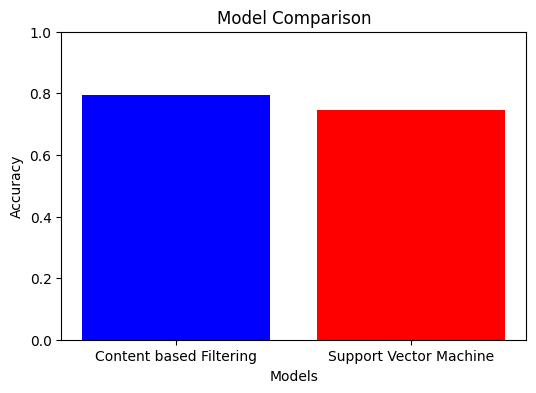

In [ ]:
import matplotlib.pyplot as plt
models = ['Content based Filtering', 'Support Vector Machine']
accuracies = [cbf_accuracy ,svm_accuracy ]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

# **MERGING NEW DATASET**

In [ ]:
import pandas as pd
file_path = '/content/hotel_data.csv'
hotel_data = pd.read_csv(file_path, encoding='ISO-8859-1')
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3465 non-null   object 
 1   location       3465 non-null   object 
 2   ratings        3365 non-null   object 
 3   review         3359 non-null   object 
 4   Number of      3359 non-null   object 
 5   Room    Score  2709 non-null   float64
 6   Room Type      3465 non-null   object 
 7   Bed Type       3449 non-null   object 
 8   price          3465 non-null   object 
dtypes: float64(1), object(8)
memory usage: 243.8+ KB


In [ ]:
columns_to_drop = [ 'Room    Score','Room Type','Bed Type']
df1 = hotel_data.drop(columns=columns_to_drop)
column_index_to_drop = 4
df1 = df1.drop(hotel_data.columns[column_index_to_drop], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3465 non-null   object
 1   location  3465 non-null   object
 2   ratings   3365 non-null   object
 3   review    3359 non-null   object
 4   price     3465 non-null   object
dtypes: object(5)
memory usage: 135.5+ KB


In [ ]:
f=[a_df,b_df,c_df]
df2=pd.concat(f,ignore_index=True)
df2.info()
merge_df = pd.concat([df1, df2], ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      273 non-null    object
 1   location  273 non-null    object
 2   price     273 non-null    object
 3   review    273 non-null    object
 4   ratings   273 non-null    object
dtypes: object(5)
memory usage: 10.8+ KB


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3738 non-null   object
 1   location  3738 non-null   object
 2   ratings   3638 non-null   object
 3   review    3632 non-null   object
 4   price     3738 non-null   object
dtypes: object(5)
memory usage: 146.1+ KB


# **RNN MODEL**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import pandas as pd




merge_df['ratings'] = pd.to_numeric(merge_df['ratings'], errors='coerce')
merge_df['ratings'].fillna(0, inplace=True)
merge_df['ratings'] = merge_df['ratings'].astype(float)

# Text features
tfidf = TfidfVectorizer()
name_feature = tfidf.fit_transform(merge_df['name'])

# Categorical features into binary
location_features = pd.get_dummies(merge_df['location'], prefix='location')


merge_df['price'] = merge_df['price'].replace('[^\d.]', '', regex=True).astype(float)
scaler = MinMaxScaler()
merge_df['price_scaled'] = scaler.fit_transform(merge_df[['price']])


features = hstack([name_feature, location_features.values, merge_df['price_scaled'].values.reshape(-1, 1)])

# Convert the sparse matrix to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=tfidf.get_feature_names_out().tolist() + location_features.columns.tolist() + ['price_scaled'])

final_df = pd.concat([merge_df, features_df], axis=1)



In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features_df, merge_df['ratings'], test_size=0.2, random_state=42)

# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Reshape input data for RNN (assuming a sequence length of 1)
X_train_np = X_train_np.reshape(X_train_np.shape[0], 1, X_train_np.shape[1])
X_test_np = X_test_np.reshape(X_test_np.shape[0], 1, X_test_np.shape[1])

# Define an RNN model with LSTM layers
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(1, X_train_np.shape[2])),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear')  # Regression task, predicting ratings
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(X_train_np, y_train_np, epochs=10, batch_size=32, validation_data=(X_test_np, y_test_np))


all_data_np = features_df.to_numpy().reshape(features_df.shape[0], 1, features_df.shape[1])
predictions = model.predict(all_data_np)

merge_df['predicted_ratings_rnn'] = predictions


top_5_hotels_rnn = merge_df.sort_values(by='predicted_ratings_rnn', ascending=False).head(5)

print(top_5_hotels_rnn[['name', 'location', 'price', 'ratings', 'predicted_ratings_rnn']])

Epoch 1/10
94/94 [==============================] - 9s 47ms/step - loss: 41.5508 - mae: 6.0081 - val_loss: 3.8184 - val_mae: 1.4957
Epoch 2/10
94/94 [==============================] - 4s 45ms/step - loss: 4.8307 - mae: 1.7047 - val_loss: 2.5044 - val_mae: 1.1192
Epoch 3/10
94/94 [==============================] - 3s 37ms/step - loss: 3.5592 - mae: 1.4646 - val_loss: 2.1473 - val_mae: 0.9977
Epoch 4/10
94/94 [==============================] - 3s 35ms/step - loss: 3.1638 - mae: 1.3926 - val_loss: 2.1218 - val_mae: 1.0056
Epoch 5/10
94/94 [==============================] - 4s 42ms/step - loss: 2.9457 - mae: 1.3700 - val_loss: 2.2012 - val_mae: 1.0208
Epoch 6/10
94/94 [==============================] - 4s 42ms/step - loss: 2.8683 - mae: 1.3437 - val_loss: 2.2219 - val_mae: 1.0339
Epoch 7/10
94/94 [==============================] - 3s 35ms/step - loss: 2.9545 - mae: 1.3671 - val_loss: 2.2717 - val_mae: 1.0423
Epoch 8/10
94/94 [==============================] - 3s 35ms/step - loss: 2.7714 - 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y_true = merge_df['ratings']
predictions = merge_df['predicted_ratings_rnn']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 0.699052834319456
Root Mean Squared Error (RMSE): 1.0060659339924272


In [ ]:
threshold = 1.0


accurate_predictions = np.abs(predictions - y_true) <= threshold
accuracy = np.sum(accurate_predictions) / len(y_true)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 78.97%


feedforward  Neural Network

In [ ]:
pip install tensorflow keras numpy scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense


encoder = LabelEncoder()
merge_df['location_encoded'] = encoder.fit_transform(merge_df['location'])


scaler = MinMaxScaler()
merge_df['ratings_scaled'] = scaler.fit_transform(merge_df['ratings'].values.reshape(-1, 1))


X = [merge_df['ratings_scaled'], merge_df['location_encoded']]
y = merge_df['ratings_scaled']  # Use ratings_scaled as the target for regression

X_train_ratings, X_val_ratings, X_train_location, X_val_location, y_train, y_val = train_test_split(
    merge_df[['ratings_scaled']], merge_df[['location_encoded']], y,
    test_size=0.2, random_state=42
)

# Define the neural network model
def create_model():
    ratings_input = Input(shape=(1,), name='ratings_input')
    location_input = Input(shape=(1,), name='location_input')

    # Embedding layer for location
    embedding_size = 10
    location_embedding = Embedding(input_dim=len(encoder.classes_), output_dim=embedding_size)(location_input)
    location_embedding = Flatten()(location_embedding)

    # Concatenate embeddings and other features
    concatenated_inputs = Concatenate()([ratings_input, location_embedding])

    # Dense layers for feature processing
    dense_1 = Dense(128, activation='relu')(concatenated_inputs)
    dense_2 = Dense(64, activation='relu')(dense_1)

    # Output layer for regression
    output = Dense(1, activation='linear')(dense_2)


    model = Model(inputs=[ratings_input, location_input], outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model


model = create_model()
model.fit([X_train_ratings, X_train_location], y_train, epochs=10, batch_size=32, validation_data=([X_val_ratings, X_val_location], y_val), verbose=0)

user_rating = 8.5
user_location = 'Lahore'

# Encode user input
user_rating_scaled = scaler.transform(np.array([[user_rating]]))
user_location_encoded = encoder.transform([user_location])


predicted_rating_scaled = model.predict([user_rating_scaled, user_location_encoded])[0][0]

# Inverse transform the predicted rating to the original scale
predicted_rating = scaler.inverse_transform(np.array([[predicted_rating_scaled]]))[0][0]


filtered_hotels = merge_df[merge_df['location'] == user_location]


top_n = 5
top_indices = filtered_hotels['ratings_scaled'].nlargest(top_n).index

print(f"Recommended hotels for {user_location} with a predicted rating around {predicted_rating:.2f}:")
for index in top_indices:
    hotel_name = filtered_hotels.loc[index, 'name']
    hotel_rating = filtered_hotels.loc[index, 'ratings']
    hotel_price = filtered_hotels.loc[index, 'price']

    print(f"Hotel: {hotel_name}, Rating: {hotel_rating}, Price: ${hotel_price}")


1/1 [==============================] - 0s 176ms/step
Recommended hotels for Lahore with a predicted rating around 8.50:
Hotel: Hayyat Luxury Suites, Rating: 9.5, Price: $45.0
Hotel: The Orchard Hotel Lahore, Rating: 9.4, Price: $63.0
Hotel: Ambiance Boutique Art Hotel Lahore, Rating: 9.4, Price: $74.0
Hotel: Goldcrest Luxury Apartments, Rating: 9.4, Price: $62.0
Hotel: Lawrence View Hotel, Rating: 9.3, Price: $31.0


In [ ]:
# Define threshold for classifying as "Good"
threshold = 0.8


# Inverse transform the predicted ratings to the original scale
predicted_ratings_val_original_scale = scaler.inverse_transform(model.predict([X_val_ratings, X_val_location])).flatten()

# Convert regression predictions to binary classification
predicted_classes = (predicted_ratings_val_original_scale > threshold).astype(int)
y_val_classes = (y_val > threshold).astype(int)


from sklearn.metrics import accuracy_score, classification_report


classification_rep = classification_report(y_val_classes, predicted_classes, zero_division=1)


accuracy = accuracy_score(y_val_classes, predicted_classes)

print(f'Classification Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)


24/24 [==============================] - 0s 2ms/step
Classification Accuracy: 0.6644
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       270
           1       0.66      1.00      0.79       478

    accuracy                           0.66       748
   macro avg       0.83      0.54      0.46       748
weighted avg       0.78      0.66      0.55       748



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = y_val
predicted_reviews_val = model.predict([X_val_ratings, X_val_location])

# Inverse transform the predicted ratings to the original scale
predicted_reviews_val_original_scale = scaler.inverse_transform(predicted_reviews_val).flatten()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, predicted_reviews_val_original_scale)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, predicted_reviews_val_original_scale))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


24/24 [==============================] - 0s 7ms/step
Mean Absolute Error (MAE): 7.1583
Root Mean Squared Error (RMSE): 7.3099


In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


model_names = ['SVM', 'Content-based filtering']
accuracies = [0.875, 0.7636]


colors = ['blue', 'orange']

fig = make_subplots(rows=1, cols=1, subplot_titles=['Accuracy Comparison'], specs=[[{'type': 'bar'}]])

trace = go.Bar(
    x=model_names,
    y=accuracies,
    marker=dict(color=colors),
    text=[f'Accuracy: {at*100:.2f}%' for at in accuracies],
    textposition='outside'
)

fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(title=' Maching Laerning Models'),
    yaxis=dict(title='Accuracy'),
    showlegend=False
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Atest_accuracy = 0.78
Ftest_accuracy = 0.6964


colors = ['blue', 'red']

fig = make_subplots(rows=1, cols=1, subplot_titles=['Accuracy Comparison'], specs=[[{'type': 'bar'}]])

trace = go.Bar(
    x=['RNN', 'Feedforward Neural Network'],
    y=[Atest_accuracy, Ftest_accuracy],
    marker=dict(color=colors),
    text=[f'Accuracy: {at*100:.2f}%' for at in [Atest_accuracy, Ftest_accuracy]],
    textposition='outside'
)

fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(title='Deep Learning Models'),
    yaxis=dict(title='Accuracy'),
    showlegend=False
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


model_names = ['SVM', 'Content-based Filtering', 'RNN', 'Feedforward Neural Network']
accuracies = [0.875, 0.7636, 0.78, 0.6964]


colors = ['blue', 'orange', 'green', 'red']

fig = make_subplots(rows=1, cols=1, subplot_titles=['Accuracy Comparison'], specs=[[{'type': 'bar'}]])

trace = go.Bar(
    x=model_names,
    y=accuracies,
    marker=dict(color=colors),
    text=[f'Accuracy: {at*100:.2f}%' for at in accuracies],
    textposition='outside'
)

fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(title='Models'),
    yaxis=dict(title='Accuracy'),
    showlegend=False
)

fig.show()


# **FEATURE IMPORTANCE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(features_df, y)
feature_importances = model.feature_importances_
feature_names = tfidf.get_feature_names_out().tolist() + location_features.columns.tolist()
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=feature_importances, marker_color='blue'))
fig.update_layout(
    xaxis=dict(title='Feature'),
    yaxis=dict(title='Importance'),
    title='Feature Importances'
)
fig.show()
